In [160]:
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px
import json
import requests
import yfinance as yf
import pandas as pd
from apikeys import alpha_api_FJDG
from apikeys import alpha_api_AZ
from apikeys import alpha_api_AB
import numpy as np

In [8]:
stocks=["AAPL","AMD","TSLA","META"]
alpha_api = alpha_api_AB  # Please replace with your actual API key
# df1 = pd.DataFrame()
# pd = pd.DataFrame()  # Avoid naming variables as built-in functions
df1 = pd.DataFrame()  # Initialize an empty DataFrame to store the concatenated dataframes
for stock in stocks:
    url = f'https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol={stock}&apikey={alpha_api}&outputsize=full'
    response = requests.get(url)
    data = response.json()
    df = pd.DataFrame(data["Time Series (Daily)"])
    df = df.iloc[:, :365].T
    df.reset_index(inplace=True, drop=False)
    df.columns = ['Dates', 'Open','High','Low','Close','Volume']
    df['Ticker'] = stock
    df = df[["Ticker","Dates","Open","Close","Volume"]]
    df1 = pd.concat([df1, df], axis=0)  # Concatenate the dataframes vertically

In [9]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1460 entries, 0 to 364
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Ticker  1460 non-null   object
 1   Dates   1460 non-null   object
 2   Open    1460 non-null   object
 3   Close   1460 non-null   object
 4   Volume  1460 non-null   object
dtypes: object(5)
memory usage: 68.4+ KB


In [10]:
df1

,Ticker,Dates,Open,Close,Volume
0,AAPL,2023-10-17,176.6450,177.1500,57549350
1,AAPL,2023-10-16,176.7500,178.7200,52516984
2,AAPL,2023-10-13,181.4200,178.8500,51456082
3,AAPL,2023-10-12,180.0700,180.7100,56743119
4,AAPL,2023-10-11,178.2000,179.8000,47551098
...,...,...,...,...,...
360,META,2022-05-11,196.3250,188.7400,31153383
361,META,2022-05-10,199.5100,197.6500,34452491
362,META,2022-05-09,199.8400,196.2100,36303200
363,META,2022-05-06,207.3400,203.7700,34747158


In [20]:
stocks_2=["AMZN","INTC","MSFT","NVDA"]
alpha_api_2 = alpha_api_AB  # Please replace with your actual API key
# df1 = pd.DataFrame()
# pd = pd.DataFrame()  # Avoid naming variables as built-in functions
df2 = pd.DataFrame()  # Initialize an empty DataFrame to store the concatenated dataframes
for stock in stocks_2:
    url = f'https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol={stock}&apikey={alpha_api_2}&outputsize=full'
    response = requests.get(url)
    data = response.json()
    df = pd.DataFrame(data["Time Series (Daily)"])
    df = df.iloc[:, :365].T
    df.reset_index(inplace=True, drop=False)
    df.columns = ['Dates', 'Open','High','Low','Close','Volume']
    df['Ticker'] = stock
    df = df[["Ticker","Dates","Open","Close","Volume"]]
    df2 = pd.concat([df2, df], axis=0)  # Concatenate the dataframes vertically
    

In [21]:
df2

,Ticker,Dates,Open,Close,Volume
0,AMZN,2023-10-17,130.3900,131.4700,49344550
1,AMZN,2023-10-16,130.6900,132.5500,42832918
2,AMZN,2023-10-13,132.9800,129.7900,45824685
3,AMZN,2023-10-12,132.1700,132.3300,55528581
4,AMZN,2023-10-11,129.7400,131.8300,40741842
...,...,...,...,...,...
360,NVDA,2022-05-11,173.4700,166.3000,67016703
361,NVDA,2022-05-10,176.8900,175.9500,76147429
362,NVDA,2022-05-09,180.3400,169.5000,64445451
363,NVDA,2022-05-06,187.3600,186.7500,63329672


In [120]:
# Merging dataframes (Still want to keep df with all stock data)
all_stocks=pd.concat([df1, df2], axis=0)
all_stocks['Dates'] = pd.to_datetime(all_stocks['Dates'])
all_stocks = all_stocks.sort_values(by='Dates', ascending=True)
all_stocks = all_stocks.reset_index(drop=True)

# Cleaning dataframe for desired values only
all_stocks_clean = all_stocks.loc[:, ['Ticker', 'Dates','Close']]

# Turning dataframe from daily to weekly (We will keep daily in case we need to use it)
all_stocks_clean_weekly = pd.DataFrame(all_stocks_clean)
all_stocks_clean_weekly.set_index('Dates', inplace=True)
all_stocks_clean_weekly = all_stocks_clean_weekly.resample('W').last()
all_stocks_clean_weekly.reset_index(inplace=True)

# Creating a DELTA column for trend calculations
all_stocks_DELTA=all_stocks_clean_weekly
all_stocks_DELTA['Close'] = pd.to_numeric(all_stocks_DELTA['Close'], errors='coerce')
all_stocks_DELTA["DELTA"]=all_stocks_DELTA['Close'].pct_change()

#Cleaning a bit more
all_stocks_DELTA=round(all_stocks_DELTA.fillna(0),2)
all_stocks_DELTA

,Dates,Ticker,Close,DELTA
0,2022-05-08,MSFT,274.73,0.00
1,2022-05-15,NVDA,177.06,-0.36
2,2022-05-22,MSFT,252.56,0.43
3,2022-05-29,META,195.13,-0.23
4,2022-06-05,NVDA,187.20,-0.04
...,...,...,...,...
72,2023-09-24,AAPL,174.79,3.61
73,2023-10-01,AMD,102.82,-0.41
74,2023-10-08,MSFT,327.26,2.18
75,2023-10-15,AAPL,178.85,-0.45


In [121]:
def my_line_chart(dataframe, stock):
    # Create a line chart
    fig = px.line(dataframe, x='Dates', y=['DELTA'], labels={'value': 'Price Change'}, title=f'{stock} Delta Over Time')

    # Customizing chart layout
    fig.update_layout(
        xaxis_title='Dates',
        yaxis_title="Delta",
        legend_title='Price Type',
        xaxis=dict(tickformat='%b %d, %Y'),  # Formatting x-axis labels
        title_x=0.5,  # (0.5 means center)
        title_y=0.95,
    )

    # Show chart
    fig.show()

In [122]:
my_stocks=["AAPL","AMD","TSLA","META","AMZN","INTC","MSFT","NVDA"]

for stock in my_stocks:
    data = all_stocks_DELTA.query(f"Ticker == '{stock}'")
    my_line_chart(data,stock)

In [105]:
my_stocks=["AAPL","AMD","TSLA","META","AMZN","INTC","MSFT","NVDA"]

for stock in my_stocks:
    data = yf.download(f"{stock}", start='2022-11-01', end='2022-12-31')
    ticker = yf.Ticker(f"{stock}")
    beta = ticker.info['beta']
    print(f"{stock} Beta: {beta}")
    pe_ratio = ticker.info.get('trailingPE', 'N/A')
    #pe_ratio = ticker.info['trailingPE']
    print(f"{stock} PE Ratio: {pe_ratio}")




[*********************100%%**********************]  1 of 1 completed
AAPL Beta: 1.308
AAPL PE Ratio: 29.52227
[*********************100%%**********************]  1 of 1 completed
AMD Beta: 1.648
AMD PE Ratio: N/A
[*********************100%%**********************]  1 of 1 completed
TSLA Beta: 2.247
TSLA PE Ratio: 69.02699
[*********************100%%**********************]  1 of 1 completed
META Beta: 1.21
META PE Ratio: 36.858124
[*********************100%%**********************]  1 of 1 completed
AMZN Beta: 1.188
AMZN PE Ratio: 101.54532
[*********************100%%**********************]  1 of 1 completed
INTC Beta: 0.893
INTC PE Ratio: N/A
[*********************100%%**********************]  1 of 1 completed
MSFT Beta: 0.899
MSFT PE Ratio: 34.005157
[*********************100%%**********************]  1 of 1 completed
NVDA Beta: 1.684
NVDA PE Ratio: 101.646484


In [123]:
my_stocks = ["AAPL", "AMD", "TSLA", "META", "AMZN", "INTC", "MSFT", "NVDA"]

# Lists to store the data
stock_data = []
stock_betas = []
stock_pe_ratios = []

for stock in my_stocks:
    # Download yahoo finance data
    data = yf.download(stock, start='2022-11-01', end='2022-12-31')
    
    # Ticker for stock
    ticker = yf.Ticker(stock)
    
    # Get beta
    beta = ticker.info.get('beta', 'N/A')
    
    # Get P/E ratio - if not available then 'N/A'
    pe_ratio = ticker.info.get('trailingPE', 'N/A')
    
    # Append the data to my empty lists
    stock_data.append(data)
    stock_betas.append(beta)
    stock_pe_ratios.append(pe_ratio)

# Dictionary to store data
data_dict = {
    'Stock': my_stocks,
    'Beta': stock_betas,
    'PE Ratio': stock_pe_ratios
}

# Create & clean df
stock_df = pd.DataFrame(data_dict)
stock_df['PE Ratio'].replace('N/A', 0, inplace=True)
stock_df = stock_df.round({'Beta': 2, 'PE Ratio': 2})
stock_df


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


,Stock,Beta,PE Ratio
0,AAPL,1.31,29.44
1,AMD,1.65,0.00
2,TSLA,2.25,62.53
3,META,1.21,36.42
4,AMZN,1.19,101.90
5,INTC,0.89,0.00
6,MSFT,0.90,34.26
7,NVDA,1.68,101.69


In [150]:
def my_bar_chart(metric):
    fin_data = stock_df[['Stock', f"{metric}"]]
    fin_frame = pd.DataFrame(fin_data)

    fig = px.bar(fin_frame, x='Stock', y=f'{metric}', labels={'Beta': 'Beta Value'}, title=f'{metric} Values per Stock')
    fig.update_layout(xaxis_title='Stock', yaxis_title=f"{metric}", title_x=0.5, title_y=0.95),
    #fig.update_traces(marker_color='red'),
    fig.show()


In [151]:
metrics=["Beta","PE Ratio"]

for metric in metrics:
    my_bar_chart(metric)

In [165]:
def bollinger(dataframe,stock):
    dataframe = pd.DataFrame(np.random.randn(100, 1), columns=['Price'])
    rolling_mean = dataframe['Price'].rolling(window=20).mean()
    rolling_std = dataframe['Price'].rolling(window=20).std()
    upper_band = rolling_mean + 2 * rolling_std
    lower_band = rolling_mean - 2 * rolling_std
    plt.figure(figsize=(12, 6))
    plt.plot(dataframe.index, dataframe['Price'], label='Price')
    plt.plot(dataframe.index, rolling_mean, label='Rolling Mean')
    plt.plot(dataframe.index, upper_band, label='Upper Band')
    plt.plot(dataframe.index, lower_band, label='Lower Band')
    plt.fill_between(dataframe.index, upper_band, lower_band, alpha=0.2)
    plt.title(f'{stock} Bollinger Bands')
    plt.xlabel('Index')
    plt.ylabel('Price')
    plt.legend()
    plt.show()

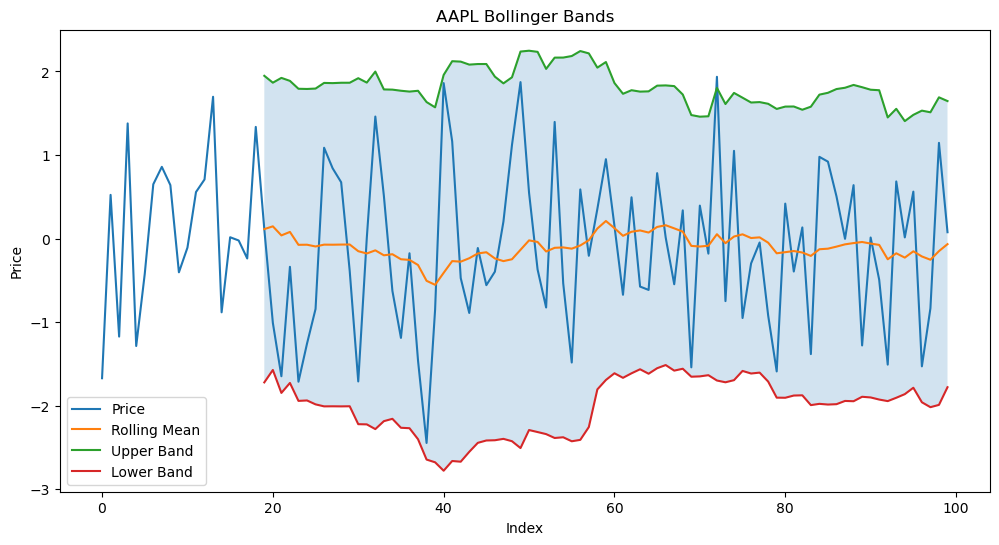

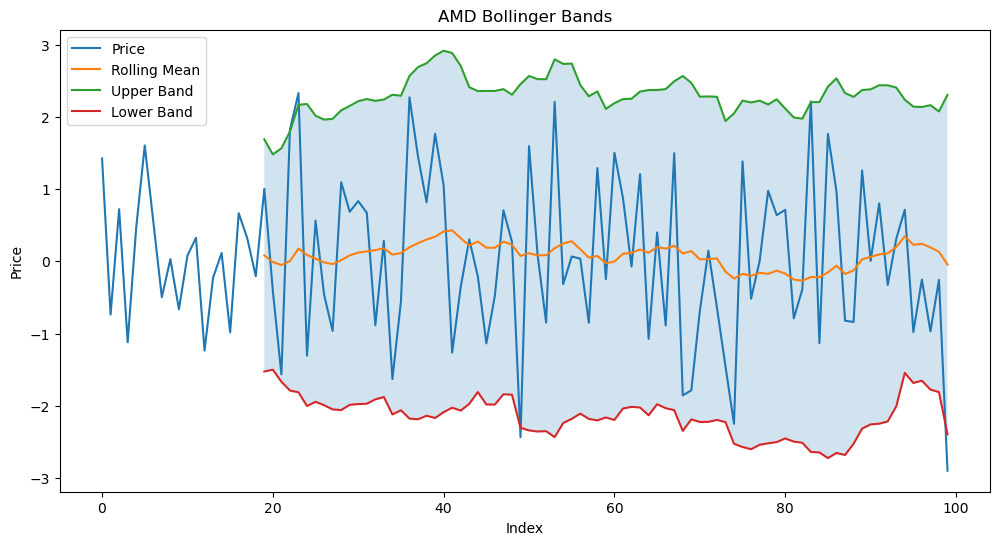

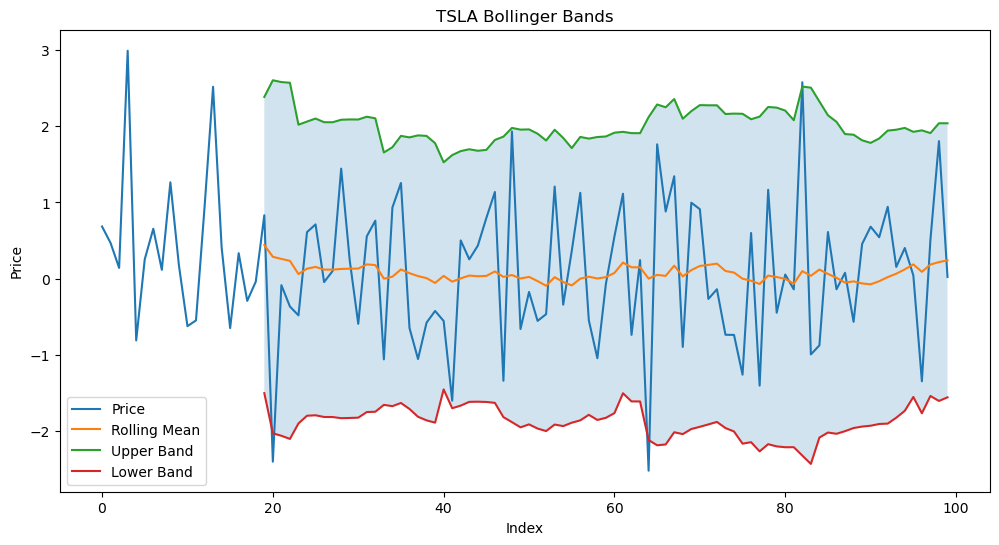

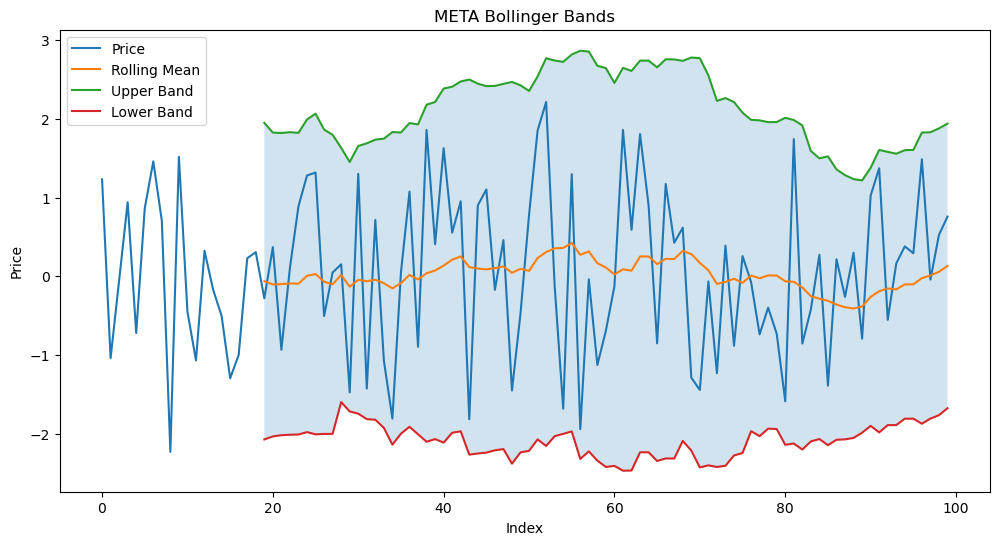

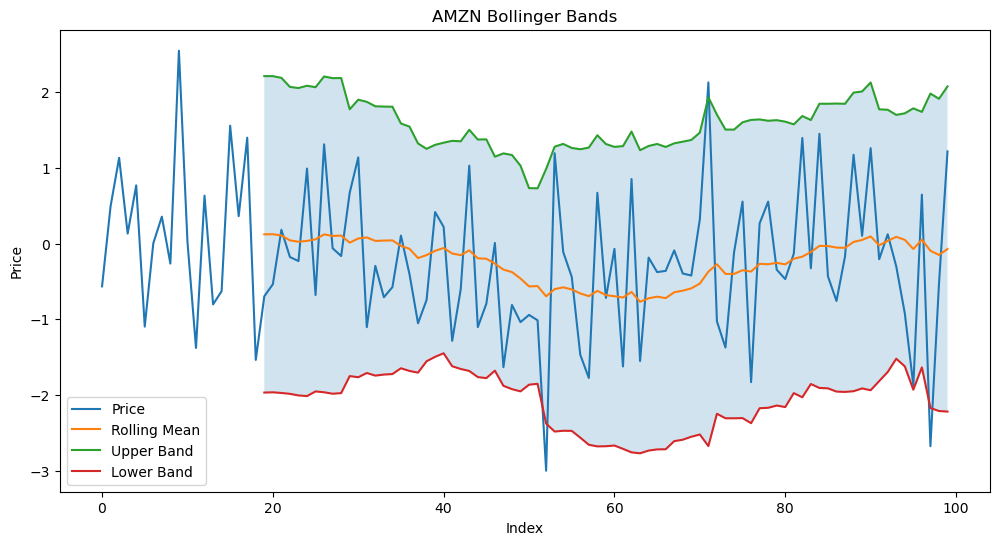

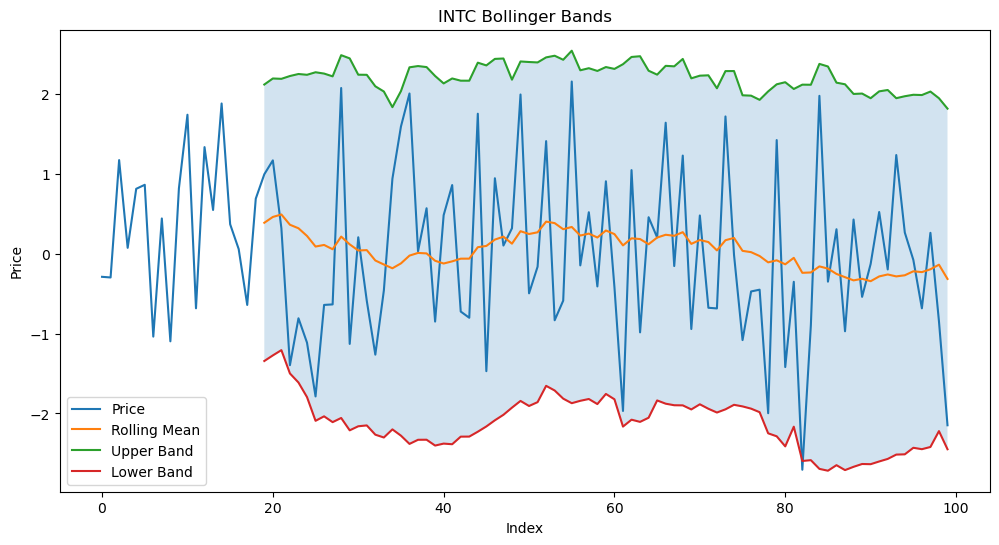

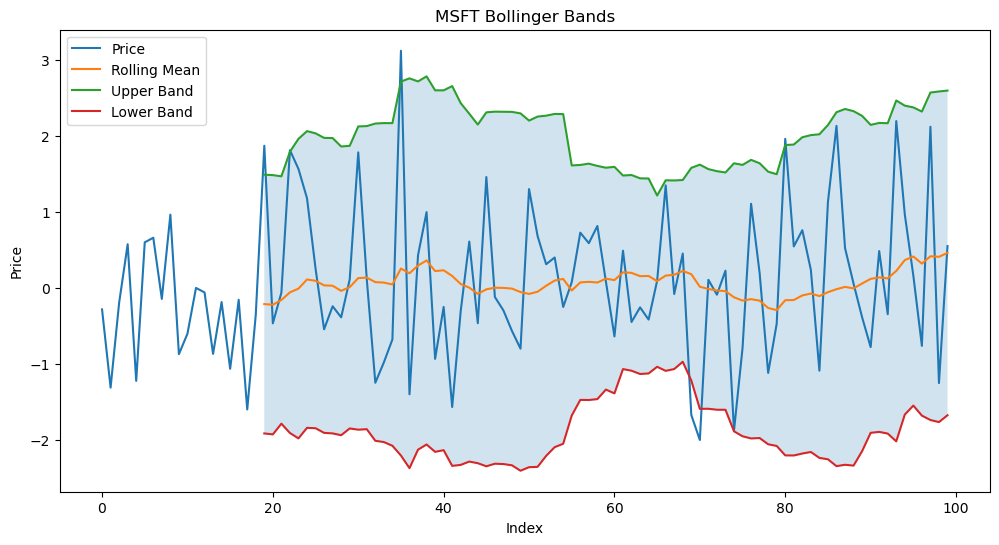

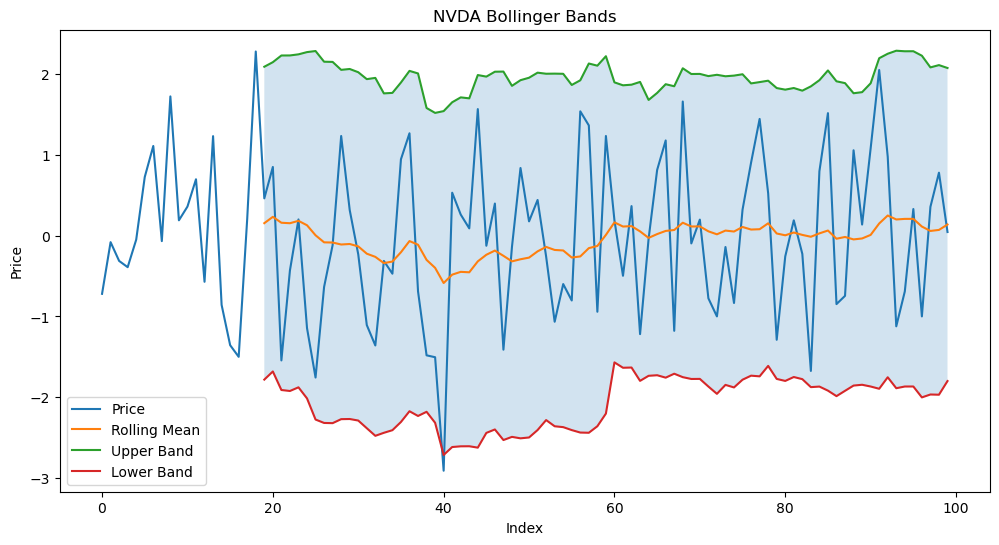

In [166]:
for stock in my_stocks:
    data = all_stocks_clean[all_stocks_clean["Ticker"].str.contains(f"{stock}", case=False)]
    bollinger(data,stock)
    

    

In [158]:

Meta_df = all_stocks_clean[all_stocks_clean["Ticker"].str.contains("META", case=False)]
Meta_df

,Ticker,Dates,Close
0,META,2022-05-05,208.2800
9,META,2022-05-06,203.7700
23,META,2022-05-09,196.2100
24,META,2022-05-10,197.6500
36,META,2022-05-11,188.7400
...,...,...,...
2883,META,2023-10-11,327.8200
2889,META,2023-10-12,324.1600
2902,META,2023-10-13,314.6900
2905,META,2023-10-16,321.1500


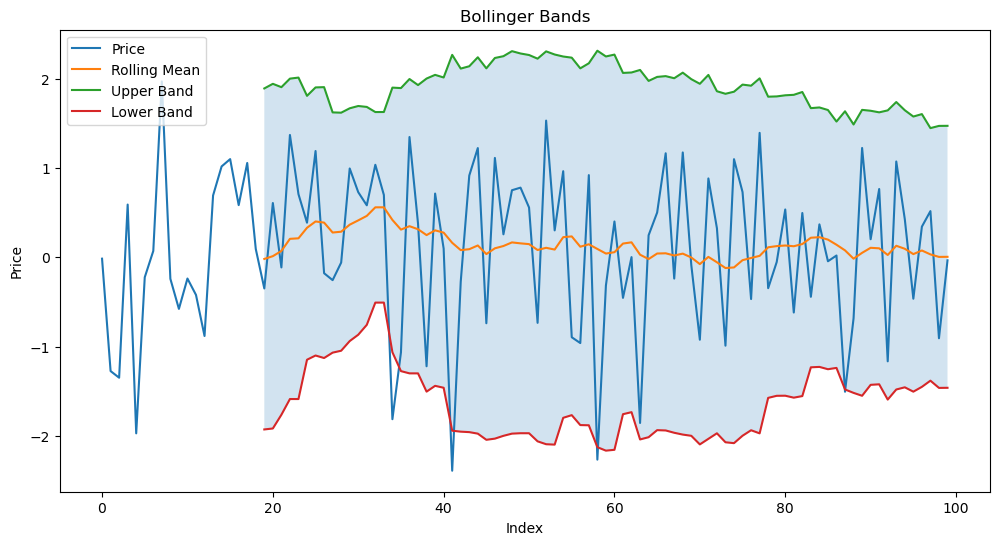

In [161]:
Meta_df = pd.DataFrame(np.random.randn(100, 1), columns=['Price'])
rolling_mean = Meta_df['Price'].rolling(window=20).mean()
rolling_std = Meta_df['Price'].rolling(window=20).std()
upper_band = rolling_mean + 2 * rolling_std
lower_band = rolling_mean - 2 * rolling_std
plt.figure(figsize=(12, 6))
plt.plot(Meta_df.index, Meta_df['Price'], label='Price')
plt.plot(Meta_df.index, rolling_mean, label='Rolling Mean')
plt.plot(Meta_df.index, upper_band, label='Upper Band')
plt.plot(Meta_df.index, lower_band, label='Lower Band')
plt.fill_between(Meta_df.index, upper_band, lower_band, alpha=0.2)
plt.title('Bollinger Bands')
plt.xlabel('Index')
plt.ylabel('Price')
plt.legend()
plt.show()

count         2920
unique        2763
top       125.9800
freq             3
Name: Close, dtype: object

In [94]:
my_stocks=["AAPL","AMD","TSLA","META","AMZN","INTC","MSFT","NVDA"]



amzn = all_stocks_DELTA.query("Ticker == 'NVDA'")


fig = px.line(amzn, x='Dates', y=['DELTA'], labels={'value': 'Price Change'}, title='AMZN Opening and Closing Prices Over Time')

# Customize the chart layout (optional)
fig.update_layout(
    xaxis_title='Dates',
    yaxis_title='Price',
    legend_title='Price Type',
    xaxis=dict(tickformat='%b %d, %Y'),  # Formatting x-axis labels
    title_x=0.5,  # Set the title's x-position to center (0.5 means center)
    title_y=0.95,
)

# Show the interactive chart
fig.show()

In [41]:
#data.set_index('Dates', inplace=True)

# Resample the DataFrame to weekly frequency, taking the mean of each week's closing prices
weekly_df = data.resample('W')

# Reset the index to have 'Date' as a regular column
#weekly_df.reset_index(inplace=True)

# Display the resulting DataFrame with weekly closing prices
#weekly_df

numeric_columns = weekly_df.select_dtypes(include=['number'])  # Select only numeric columns
result = numeric_columns.mean()  # Calculate the mean of numeric columns

result

AttributeError: 'DatetimeIndexResampler' object has no attribute 'select_dtypes'

In [60]:
#amzn=all_stocks[all_stocks["Ticker"].str.contains("META", case=False)]
amzn_2 = all_stocks_clean.query("Ticker == 'META'")


In [61]:
print(amzn_2)

     Ticker      Dates     Close
0      META 2022-05-05  208.2800
9      META 2022-05-06  203.7700
23     META 2022-05-09  196.2100
24     META 2022-05-10  197.6500
36     META 2022-05-11  188.7400
...     ...        ...       ...
2883   META 2023-10-11  327.8200
2889   META 2023-10-12  324.1600
2902   META 2023-10-13  314.6900
2905   META 2023-10-16  321.1500
2913   META 2023-10-17  324.0000

[365 rows x 3 columns]


In [58]:
all_stocks_clean = all_stocks.loc[:, ['Ticker', 'Dates','Close']]
all_stocks_clean

,Ticker,Dates,Close
0,META,2022-05-05,208.2800
1,MSFT,2022-05-05,277.3500
2,INTC,2022-05-05,44.6000
3,AMZN,2022-05-05,2328.1400
4,TSLA,2022-05-05,873.2800
...,...,...,...
2915,TSLA,2023-10-17,254.8500
2916,NVDA,2023-10-17,439.3800
2917,AMD,2023-10-17,105.1400
2918,AMZN,2023-10-17,131.4700


In [62]:
df = pd.DataFrame(all_stocks_clean)

# Set the 'Dates' column as the index if it's not already
df.set_index('Dates', inplace=True)

# Resample the DataFrame to weekly frequency, taking the last value of each week's closing price
weekly_df = df.resample('W').last()

# Reset the index to have 'Dates' as a regular column
weekly_df.reset_index(inplace=True)

# Display the resulting DataFrame with weekly closing prices
print(weekly_df)


        Dates Ticker     Close
0  2022-05-08   MSFT  274.7300
1  2022-05-15   NVDA  177.0600
2  2022-05-22   MSFT  252.5600
3  2022-05-29   META  195.1300
4  2022-06-05   NVDA  187.2000
..        ...    ...       ...
72 2023-09-24   AAPL  174.7900
73 2023-10-01    AMD  102.8200
74 2023-10-08   MSFT  327.2600
75 2023-10-15   AAPL  178.8500
76 2023-10-22   AAPL  177.1500

[77 rows x 3 columns]


In [64]:
all_stocks_clean_weekly

,Dates,Ticker,Close
0,2022-05-08,MSFT,274.7300
1,2022-05-15,NVDA,177.0600
2,2022-05-22,MSFT,252.5600
3,2022-05-29,META,195.1300
4,2022-06-05,NVDA,187.2000
...,...,...,...
72,2023-09-24,AAPL,174.7900
73,2023-10-01,AMD,102.8200
74,2023-10-08,MSFT,327.2600
75,2023-10-15,AAPL,178.8500
